<a href="https://colab.research.google.com/github/LuoYanHao-2025/Data_Science_Group31/blob/data-transformation/Copy_of_project_iman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/My Drive/WIA1007_Project/smartwatch_health_data.csv"
df = pd.read_csv(file_path)


In [ ]:
df.info()

print("\nMissing value")
print(df.isnull().sum())

print("\nUnique Category")
print(df['Activity Level'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   float64
 1   Heart Rate (BPM)        9600 non-null   float64
 2   Blood Oxygen Level (%)  9700 non-null   float64
 3   Step Count              9900 non-null   float64
 4   Sleep Duration (hours)  9850 non-null   object 
 5   Activity Level          9800 non-null   object 
 6   Stress Level            9800 non-null   object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB

Missing value
User ID                   201
Heart Rate (BPM)          400
Blood Oxygen Level (%)    300
Step Count                100
Sleep Duration (hours)    150
Activity Level            200
Stress Level              200
dtype: int64

Unique Category
['Highly Active' 'Highly_Active' 'Actve' 'Seddentary' 'Sedentary' 'Active'
 nan]


In [ ]:
df = df.drop(columns=['Heart Rate (BPM)', 'Blood Oxygen Level (%)'], errors='ignore')

In [ ]:
df['Sleep Duration (hours)'] = pd.to_numeric(df['Sleep Duration (hours)'], errors='coerce')

In [ ]:
Q1 = df['Step Count'].quantile(0.25)
Q3 = df['Step Count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [ ]:
df = df[(df['Step Count'] >= lower_bound) & (df['Step Count'] <= upper_bound)]

In [ ]:
df['Sleep Duration (hours)'] = df['Sleep Duration (hours)'].fillna(df['Sleep Duration (hours)'].median())
df['Activity Level'] = df['Activity Level'].fillna(df['Activity Level'].mode()[0])
df['Stress Level'] = df['Stress Level'].fillna(df['Stress Level'].mode()[0])


In [ ]:
df['Activity Level'] = df['Activity Level'].str.replace('_', ' ').replace({'Actve': 'Active', 'Seddentary': 'Sedentary'})


In [ ]:
df = df.drop_duplicates()

In [ ]:
df = df.dropna(subset=['User ID'])

In [ ]:
df = df.round(1)

In [ ]:
# Convert User ID from float (4174.0) to integer (4174)
df['User ID'] = df['User ID'].astype(int)

In [ ]:
# 1. Force the column to be numeric. 'coerce' turns text errors into NaN
df['Stress Level'] = pd.to_numeric(df['Stress Level'], errors='coerce')

# 2. Drop the rows that became NaN
df = df.dropna(subset=['Stress Level'])

# 3. (Optional) Convert back to integers to look clean (e.g., 8.0 -> 8)
df['Stress Level'] = df['Stress Level'].astype(int)

In [ ]:
df= df.drop(columns=['User ID'])

In [ ]:
df.head()

,Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,5450.4,7.2,Highly Active,1
2,2826.5,6.5,Highly Active,5
3,13797.3,7.4,Active,3
4,15679.1,6.5,Highly Active,6
5,10206.0,8.4,Highly Active,10


In [ ]:
output_path = "/content/drive/MyDrive/WIA1007_Project/cleaned_smartwatch_health_data.csv"
df.to_csv(output_path, index=False)

In [ ]:
file_path = "/content/drive/MyDrive/WIA1007_Project/Mental_Health_Lifestyle_Dataset.csv"
df2 = pd.read_csv(file_path)

In [ ]:
df2 = df2.rename(columns={
    'Exercise Level': 'Activity Level',
    'Sleep Hours': 'Sleep Duration (hours)'
})


In [ ]:
df2 = df2[['Activity Level', 'Sleep Duration (hours)', 'Stress Level']]

In [ ]:
df2['Sleep Duration (hours)'] = df2['Sleep Duration (hours)'].fillna(df2['Sleep Duration (hours)'].median())
df2['Activity Level'] = df2['Activity Level'].fillna(df2['Activity Level'].mode()[0])
df2['Stress Level'] = df2['Stress Level'].fillna(df2['Stress Level'].mode()[0])
#fill missing value

In [ ]:
stress = {'Low': 2, 'Moderate': 5, 'High': 8}
df2['Stress Level'] = df2['Stress Level'].map(stress)

In [ ]:
Q1 = df2['Sleep Duration (hours)'].quantile(0.25)
Q3 = df2['Sleep Duration (hours)'].quantile(0.75)
IQR = Q3 - Q1
df2 = df2[(df2['Sleep Duration (hours)'] >= (Q1 - 1.5 * IQR)) & (df2['Sleep Duration (hours)'] <= (Q3 + 1.5 * IQR))]

In [ ]:
df2 = df2.drop_duplicates()

In [ ]:
df2.head()

,Activity Level,Sleep Duration (hours),Stress Level
0,Low,6.3,2
1,Moderate,4.9,2
2,Low,7.2,8
3,Low,7.2,2
4,Low,7.3,2


In [ ]:
output_path = "/content/drive/MyDrive/WIA1007_Project/cleaned_Mental_Health_Lifestyle_Dataset.csv"
df2.to_csv(output_path, index=False)

In [ ]:
file_path = "/content/drive/MyDrive/WIA1007_Project/expanded_sleep_data_with_bio.csv"
df3 = pd.read_csv(file_path)

In [ ]:
df3 = df3.rename(columns={
    'Physical Activity Level': 'Activity Level',
    'Sleep Duration': 'Sleep Duration (hours)'
})


In [ ]:
df3 = df3[['Activity Level', 'Sleep Duration (hours)', 'Stress Level', 'Quality of Sleep']]

In [ ]:
for col in df3.columns:
    df3[col] = df3[col].fillna(df3[col].median())

In [ ]:
for col in ['Sleep Duration (hours)', 'Activity Level']:
    Q1 = df3[col].quantile(0.25)
    Q3 = df3[col].quantile(0.75)
    IQR = Q3 - Q1
    df3 = df3[(df3[col] >= (Q1 - 1.5 * IQR)) & (df3[col] <= (Q3 + 1.5 * IQR))]

In [ ]:
df3 = df3.drop_duplicates()

In [ ]:
df3.head()

,Activity Level,Sleep Duration (hours),Stress Level,Quality of Sleep
0,42,6.1,6,6
1,60,6.2,8,6
3,30,5.9,8,4
6,40,6.3,7,6
7,75,7.8,6,7


In [ ]:
output_path = "/content/drive/MyDrive/WIA1007_Project/cleaned_expanded_sleep_data_with_bio.csv"
df3.to_csv(output_path, index=False)

In [ ]:
# Create a dictionary to map the values
mapping = {
    'Low': 'Sedentary',
    'Moderate': 'Active',
    'High': 'Highly Active'
}

# Apply the mapping
df2['Activity Level'] = df2['Activity Level'].map(mapping)

In [ ]:
def classify_activity(score):
    if score < 30:
        return 'Sedentary'
    elif score <= 60:
        return 'Active'
    else:
        return 'Highly Active'

df3['Activity Level'] = df3['Activity Level'].apply(classify_activity)

In [ ]:
# Check column names
#df2 mental
#df3 sleep
print(df.columns)
print(df3.columns)
print(df2.columns)

# If 'Sleep Duration' is named differently in one file (e.g. 'Sleep Duration (hours)' vs 'Sleep'), rename it:
# df2.rename(columns={'Sleep': 'Sleep Duration (hours)'}, inplace=True)

Index(['Step Count', 'Sleep Duration (hours)', 'Activity Level',
       'Stress Level'],
      dtype='object')
Index(['Activity Level', 'Sleep Duration (hours)', 'Stress Level',
       'Quality of Sleep'],
      dtype='object')
Index(['Activity Level', 'Sleep Duration (hours)', 'Stress Level'], dtype='object')


In [ ]:
# Add a 'Source' column so you know where the data came from later
df['Dataset_Source'] = 'Smartwatch'
df3['Dataset_Source'] = 'Sleep_Bio'
df2['Dataset_Source'] = 'Mental_Health'

# Concatenate
final_df = pd.concat([df, df3, df2], ignore_index=True)
final_df.head()

,Step Count,Sleep Duration (hours),Activity Level,Stress Level,Dataset_Source,Quality of Sleep
0,5450.4,7.2,Highly Active,1,Smartwatch,NaN
1,2826.5,6.5,Highly Active,5,Smartwatch,NaN
2,13797.3,7.4,Active,3,Smartwatch,NaN
3,15679.1,6.5,Highly Active,6,Smartwatch,NaN
4,10206.0,8.4,Highly Active,10,Smartwatch,NaN


In [ ]:
# 1. Fill missing Step Counts with the average step count
mean_steps = final_df['Step Count'].mean()
final_df['Step Count'] = final_df['Step Count'].fillna(mean_steps)

# 2. Fill missing Quality of Sleep with the Median (better for 1-10 ratings)
median_quality = final_df['Quality of Sleep'].median()
final_df['Quality of Sleep'] = final_df['Quality of Sleep'].fillna(median_quality)

# Check if it worked (should be 0 missing now)
print(final_df.isnull().sum())

Step Count                0
Sleep Duration (hours)    0
Activity Level            0
Stress Level              0
Dataset_Source            0
Quality of Sleep          0
dtype: int64


In [ ]:
# Round the 'Step Count' column to 1 decimal place
final_df['Step Count'] = final_df['Step Count'].round(1)

# Verify the result by looking at the specific rows you were worried about
print(final_df.loc[9217:9220, ['Step Count', 'Dataset_Source']])

      Step Count Dataset_Source
9217      5994.2      Sleep_Bio
9218      5994.2      Sleep_Bio
9219      5994.2      Sleep_Bio
9220      5994.2      Sleep_Bio


In [ ]:
# Convert to integer (removes all decimals completely)
final_df['Step Count'] = final_df['Step Count'].astype(int)

In [ ]:
# Drop the 'Dataset_Source' column
final_df = final_df.drop(columns=['Dataset_Source'])

# Check the final result
final_df.head()

,Step Count,Sleep Duration (hours),Activity Level,Stress Level,Quality of Sleep
0,5450,7.2,Highly Active,1,7.0
1,2826,6.5,Highly Active,5,7.0
2,13797,7.4,Active,3,7.0
3,15679,6.5,Highly Active,6,7.0
4,10206,8.4,Highly Active,10,7.0


In [ ]:
final_df.head()

,Step Count,Sleep Duration (hours),Activity Level,Stress Level,Quality of Sleep
0,5450,7.2,Highly Active,1,7.0
1,2826,6.5,Highly Active,5,7.0
2,13797,7.4,Active,3,7.0
3,15679,6.5,Highly Active,6,7.0
4,10206,8.4,Highly Active,10,7.0


In [ ]:
# Check data types one last time
print(final_df.dtypes)

Step Count                  int64
Sleep Duration (hours)    float64
Activity Level             object
Stress Level                int64
Quality of Sleep          float64
dtype: object


In [ ]:
final_df.head()

,Step Count,Sleep Duration (hours),Activity Level,Stress Level,Quality of Sleep
0,5450,7.2,Highly Active,1,7.0
1,2826,6.5,Highly Active,5,7.0
2,13797,7.4,Active,3,7.0
3,15679,6.5,Highly Active,6,7.0
4,10206,8.4,Highly Active,10,7.0


In [ ]:
output_path = "/content/drive/MyDrive/WIA1007_Project/final_dataset_ds.csv"
final_df.to_csv(output_path, index=False)

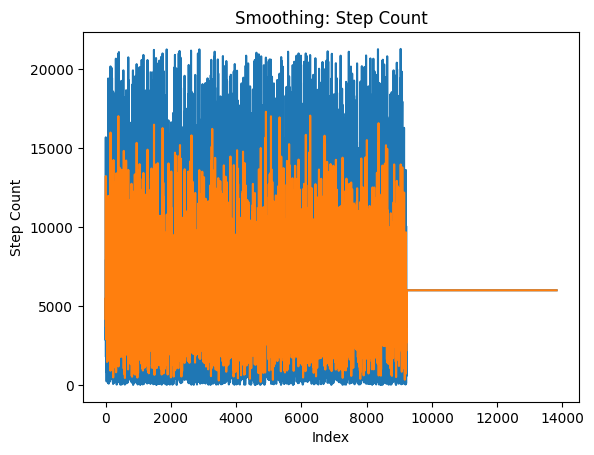

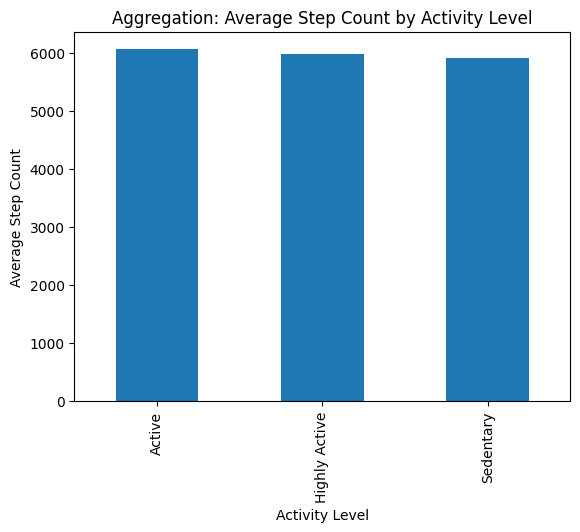

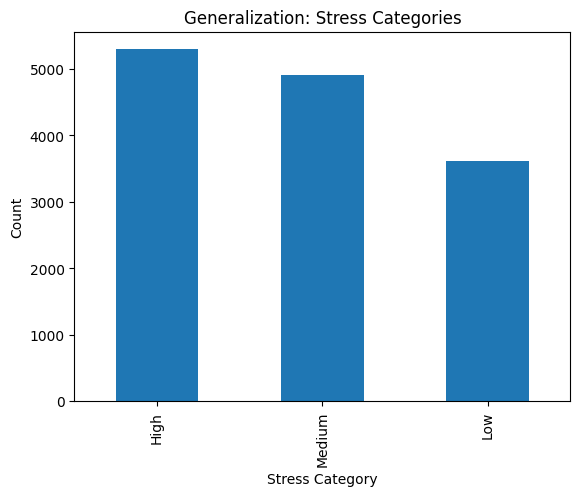

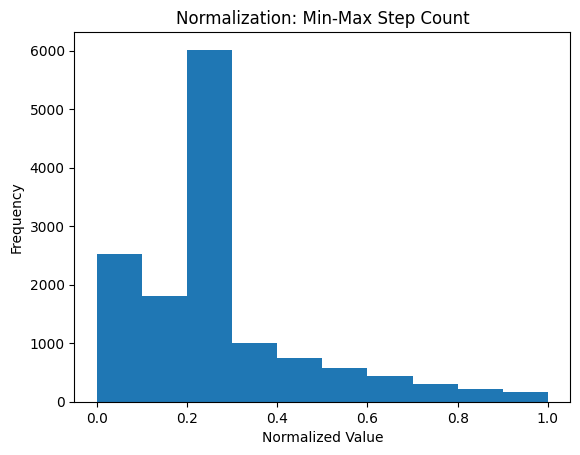

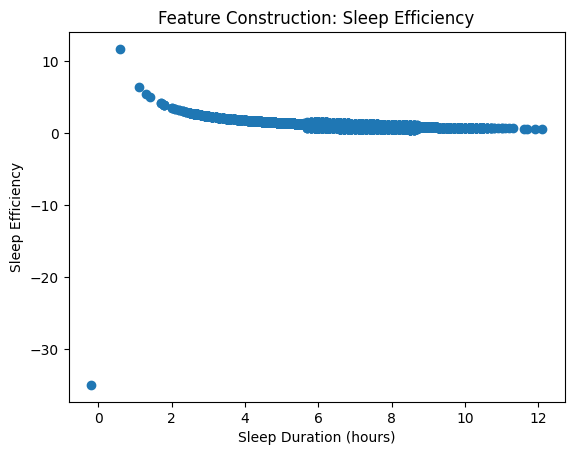

In [ ]:




# ===============================
# 1. SMOOTHING
# ===============================
final_df["StepCount_Smoothed"] = final_df["Step Count"].rolling(
    window=3, min_periods=1
).mean()

plt.figure()
plt.plot(final_df["Step Count"])
plt.plot(final_df["StepCount_Smoothed"])
plt.title("Smoothing: Step Count")
plt.xlabel("Index")
plt.ylabel("Step Count")
plt.show()

# ===============================
# 2. AGGREGATION
# ===============================
aggregation = final_df.groupby("Activity Level").mean(numeric_only=True)

plt.figure()
aggregation["Step Count"].plot(kind="bar")
plt.title("Aggregation: Average Step Count by Activity Level")
plt.xlabel("Activity Level")
plt.ylabel("Average Step Count")
plt.show()

# ===============================
# 3. GENERALIZATION
# ===============================
def stress_category(level):
    if level <= 3:
        return "Low"
    elif level <= 6:
        return "Medium"
    else:
        return "High"

final_df["Stress Category"] = final_df["Stress Level"].apply(stress_category)

plt.figure()
final_df["Stress Category"].value_counts().plot(kind="bar")
plt.title("Generalization: Stress Categories")
plt.xlabel("Stress Category")
plt.ylabel("Count")
plt.show()

# ===============================
# 4. NORMALIZATION (Min-Max)
# ===============================
final_df["StepCount_MinMax"] = (
    final_df["Step Count"] - final_df["Step Count"].min()
) / (
    final_df["Step Count"].max() - final_df["Step Count"].min()
)

plt.figure()
plt.hist(final_df["StepCount_MinMax"])
plt.title("Normalization: Min-Max Step Count")
plt.xlabel("Normalized Value")
plt.ylabel("Frequency")
plt.show()

# ===============================
# 5. FEATURE CONSTRUCTION
# ===============================
final_df["Sleep_Efficiency"] = final_df["Quality of Sleep"] / final_df["Sleep Duration (hours)"]

plt.figure()
plt.scatter(final_df["Sleep Duration (hours)"], final_df["Sleep_Efficiency"])
plt.title("Feature Construction: Sleep Efficiency")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Sleep Efficiency")
plt.show()


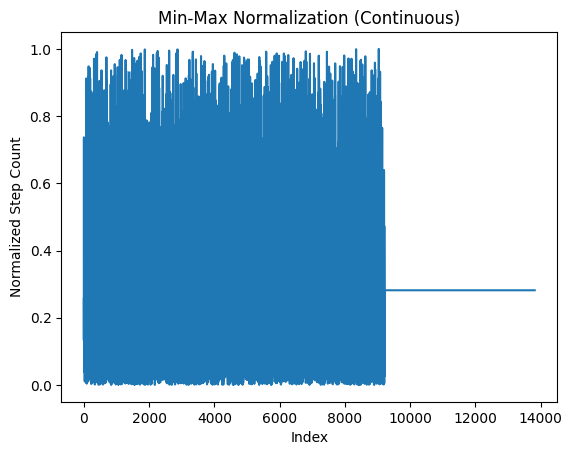

In [ ]:
# Min-Max Normalization
final_df["StepCount_MinMax"] = (
    final_df["Step Count"] - final_df["Step Count"].min()
) / (
    final_df["Step Count"].max() - final_df["Step Count"].min()
)

plt.figure()
plt.plot(final_df["StepCount_MinMax"])
plt.title("Min-Max Normalization (Continuous)")
plt.xlabel("Index")
plt.ylabel("Normalized Step Count")
plt.show()


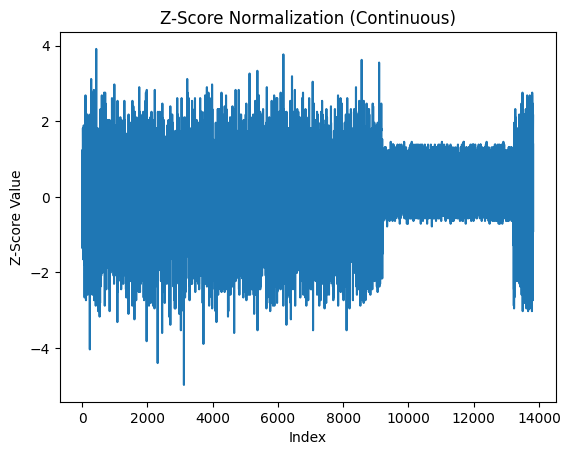

In [ ]:
# Z-Score Normalization
final_df["Sleep_ZScore"] = (
    final_df["Sleep Duration (hours)"] - final_df["Sleep Duration (hours)"].mean()
) / final_df["Sleep Duration (hours)"].std()

plt.figure()
plt.plot(final_df["Sleep_ZScore"])
plt.title("Z-Score Normalization (Continuous)")
plt.xlabel("Index")
plt.ylabel("Z-Score Value")
plt.show()


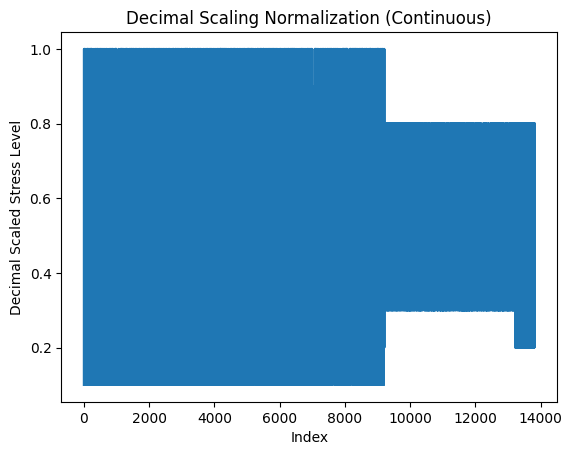

In [ ]:
# Decimal Scaling Normalization
j = np.ceil(np.log10(final_df["Stress Level"].abs().max()))
final_df["Stress_Decimal"] = final_df["Stress Level"] / (10 ** j)

plt.figure()
plt.plot(final_df["Stress_Decimal"])
plt.title("Decimal Scaling Normalization (Continuous)")
plt.xlabel("Index")
plt.ylabel("Decimal Scaled Stress Level")
plt.show()


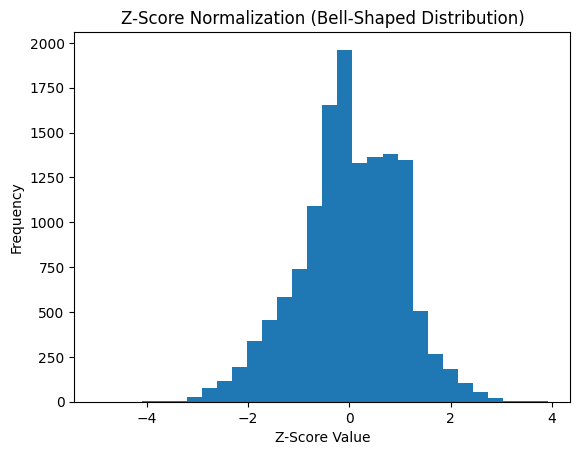

In [ ]:


# Z-score normalization
final_df["Sleep_ZScore"] = (
    final_df["Sleep Duration (hours)"] - final_df["Sleep Duration (hours)"].mean()
) / final_df["Sleep Duration (hours)"].std()

# Bell-shaped graph (histogram)
plt.figure()
plt.hist(final_df["Sleep_ZScore"], bins=30)
plt.title("Z-Score Normalization (Bell-Shaped Distribution)")
plt.xlabel("Z-Score Value")
plt.ylabel("Frequency")
plt.show()
